# Thomas Fire Boundary in Santa Barbara

Author: Fletcher McConnell

Repository: https://github.com/fletcher-m/eds220-hwk4-task3

## About

In this notebook, I create a false color image of Santa Barbara with the boundary of the Thomas Fire overlayed.

## Highlights

- Working with NetCDF raster data
- Geospatial data wrangling with geopandas
- Merging of tabular and vector data
- Creating and customizing a false color image

## About the Data

In this notebook I use two different datasets:

1) The first dataset is in a netCDF format. This data is simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. This is for the Santa Barbara region. 

- From this data, I was able to select the "red", "green", and "blue" bands to plot a true color image. I selected the "swir22", "nir08" and "red" bands to plot the false color image, which I then used to overlay the Thomas Fire burn area.

2) The second dataset was shapefile of fire perimeters in California during 2017. I filtered this data to only include the Thomas Fire, so that I could plot it.   

## Final Output

The final visualization for the false color image of Santa Barbara and the Thomas Fire burn area:

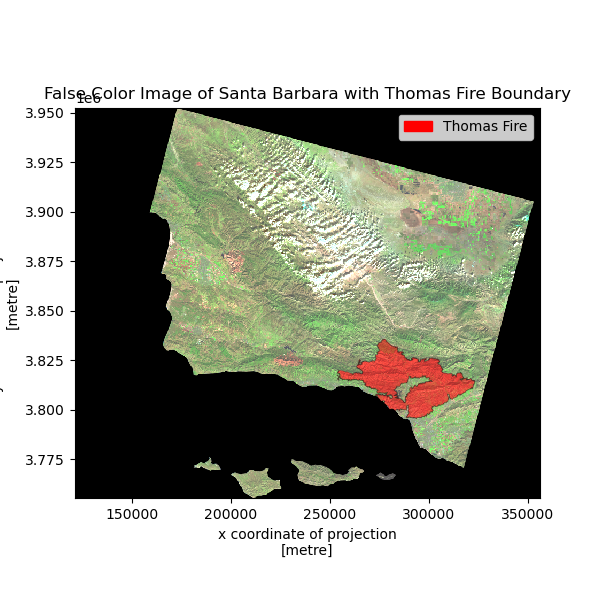


# Import Libraries and Functions

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd
from rasterio.features import rasterize
from shapely.geometry import box
from shapely.geometry import Point
from scipy.io import netcdf

# Import Data

In [3]:
bands = rioxr.open_rasterio("data/landsat8-2018-01-26-sb-simplified.nc")
fire = gpd.read_file("data/california_fire_perimeters_2017/California_Fire_Perimeters_2017.shp")

# Explore Data

In [4]:
# plot fire
#fire.plot()

# look at first 5 rows of fire data
fire.head()

# look at bands data
bands

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

# Perform Data Updates

In [5]:
# remove the band dimension for plotting
bands = bands.squeeze()
bands = bands.drop('band')

## Plot true color image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


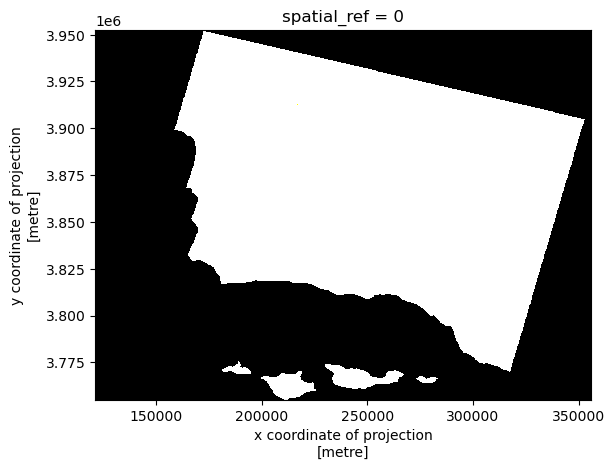

In [7]:
# select red, green and blue variables from the NetCDF data and plot 
bands[['red', 'green', 'blue']].to_array().plot.imshow()

## Adjust for outliers and plot true color image

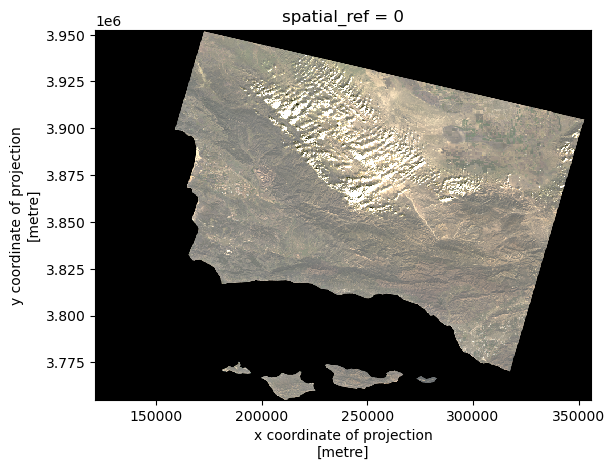

In [8]:
# adjust the scale by removing outliers from the data and plot
bands[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)

## Plot false image 

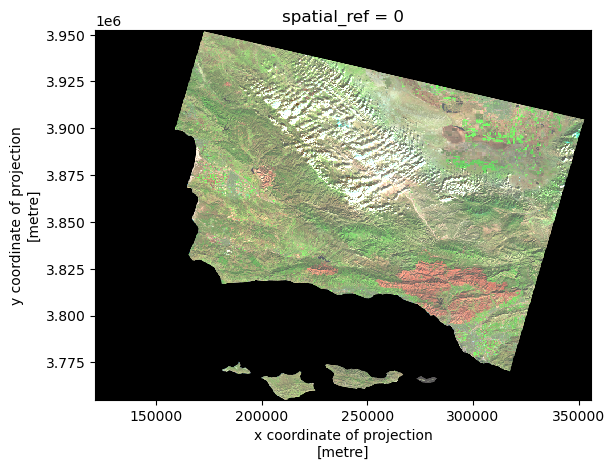

In [9]:
# select short wave infrared, near-infrared and red variables and plot
bands[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust=True)

## Filter for Thomas Fire region and more updates before plotting

In [5]:
# filter for Thomas fire
thomas_fire = fire[fire['FIRE_NAME']=="THOMAS"]

# convert thomas_fire to geodataframe with same crs as 'bands'
thomas_fire = thomas_fire.to_crs(bands.rio.crs)

# save false color map to a variable
false_color = bands[['swir22', 'nir08', 'red']].to_array()

# Plot Figure

Text(0.5, 1.0, 'False Color Image of Santa Barbara with Thomas Fire Boundary')

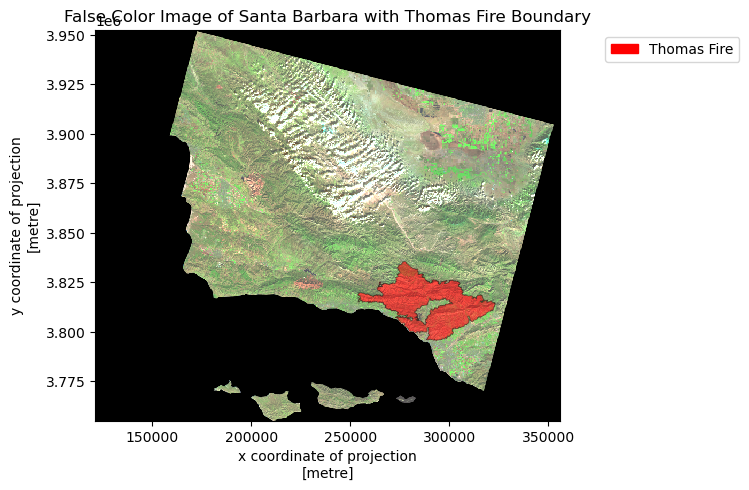

In [6]:
# initiate figure
fig, ax = plt.subplots(figsize=(6,6))

# plot outline of california and create key for legend
false_color.plot.imshow(ax=ax, robust=True)

# plot lulc bounding box and create key for legend
thomas_fire.plot(ax=ax, color='red', alpha=0.5, edgecolor='black', linewidth=0.5)
thomas_patch = mpatches.Patch(color='red', label='Thomas Fire')

# create legend
ax.legend(handles=[thomas_patch], frameon=True, loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_title('False Color Image of Santa Barbara with Thomas Fire Boundary')